In [1]:
# !wget http://cb.lk/covid_19
# !unzip covid_19

In [2]:
#!unzip covid_19

In [3]:
import keras

from keras.models import *
from keras.layers import *
from keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50
import PIL

import matplotlib.pyplot as plt
import PIL.Image as Image
import os
import random

In [4]:
# Define the path to the training directory
train_dir = "/content/CovidDataset/Train"

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
main_dir = "/content/CovidDataset"
train_data = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_data = ImageDataGenerator(rescale=1./255)

train_dir = os.path.join(main_dir, "Train")
training_set = train_data.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)
test_dir = os.path.join(main_dir, "Val")
test_set = test_data.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'

)


Found 224 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


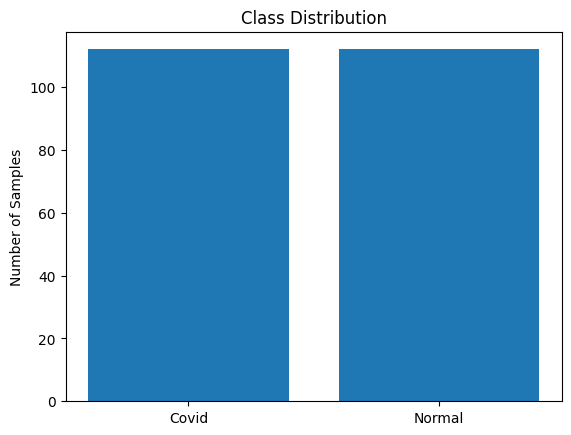

In [6]:
import collections
import matplotlib.pyplot as plt

labels_list = training_set.classes # Use training_set.classes to get all labels

label_counts = collections.Counter(labels_list)

# Assuming two classes, 0 and 1, based on the plot labels
# You can get the actual class names from training_set.class_indices if needed
class_names = list(training_set.class_indices.keys())

plt.bar(class_names, [label_counts[0], label_counts[1]])
plt.title('Class Distribution')
plt.ylabel('Number of Samples')
plt.show()

In [7]:
print(f"Number of {class_names[0]} samples: {label_counts[0]}")
print(f"Number of {class_names[1]} samples: {label_counts[1]}")

Number of Covid samples: 112
Number of Normal samples: 112


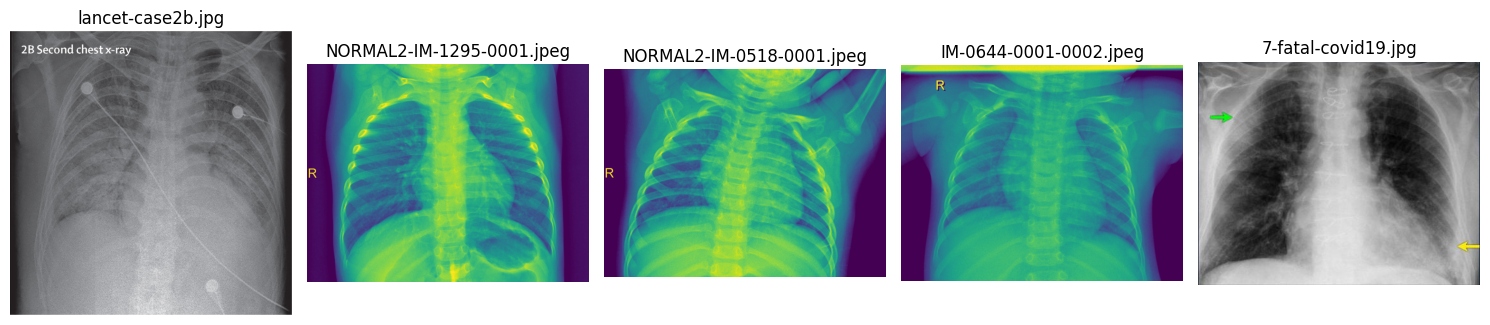

In [8]:
# List all image files
image_files = []
for class_name in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_name)
    if os.path.isdir(class_path):
        for img_name in os.listdir(class_path):
            if img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                image_files.append(os.path.join(class_path, img_name))

# Randomly select 5 images
random_images = random.sample(image_files, min(5, len(image_files)))

plt.figure(figsize=(15, 10))
for i, img_path in enumerate(random_images):
    img = Image.open(img_path)
    plt.subplot(1, min(5, len(random_images)), i + 1)
    plt.imshow(img)
    plt.title(os.path.basename(img_path))
    plt.axis('off')

plt.tight_layout()
plt.show()

In [9]:
# Download the architecture of ResNet50 with ImageNet weights
base_model = ResNet50(include_top=False, weights='imagenet')
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)

# Model to be trained
model = Model(inputs=base_model.input, outputs=predictions)

# Training only top layers i.e. the layers which we have added in the end
for layer in base_model.layers:
    layer.trainable = False

model.compile(loss=keras.losses.categorical_crossentropy, optimizer="adam", metrics=['accuracy'])
model.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, None,      │          0 │ -                 │
│ (InputLayer)        │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, None,      │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, None,      │      9,472 │ conv1_pad[0][0]   │
│                     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, None,      │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, None,      │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, None,      │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, None,      │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, None,      │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, None,      │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, None,      │          0 │ conv2_block1_1_b… │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, None,      │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, None,      │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, None,      │          0 │ conv2_block1_2_b… │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, None,      │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ None, 256)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, None,      │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ None, 256)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, None,      │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ None, 256)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, None,      │      1,024 │ conv2_block1_3_c

 Total params: 24,112,770 (91.98 MB)

 Trainable params: 525,058 (2.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [33]:
results=model.fit(
    training_set,
    steps_per_epoch=2,
    epochs=20,
    validation_data=test_set,
    validation_steps=2
)

Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 5s/step - accuracy: 0.8854 - loss: 0.3244 - val_accuracy: 0.8500 - val_loss: 0.3467
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.8854 - loss: 0.3182 - val_accuracy: 0.8667 - val_loss: 0.2726
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.8646 - loss: 0.3194 - val_accuracy: 0.9167 - val_loss: 0.2609
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.8750 - loss: 0.2933 - val_accuracy: 0.9333 - val_loss: 0.2587
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 14s 6s/step - accuracy: 0.9167 - loss: 0.2297 - val_accuracy: 0.8667 - val_loss: 0.2833
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.8333 - loss: 0.4190 - val_accuracy: 0.9333 - val_loss: 0.2550
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.8125 - loss: 0.3819 - val_accuracy: 0.8833 - val_loss: 0.2831
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.9688 - loss: 0.1823 - val_accuracy: 0.8500 - val_loss: 0.3056
Epoch 9/20
2/2 

In [34]:
results.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Text(0.5, 0, 'epoch')

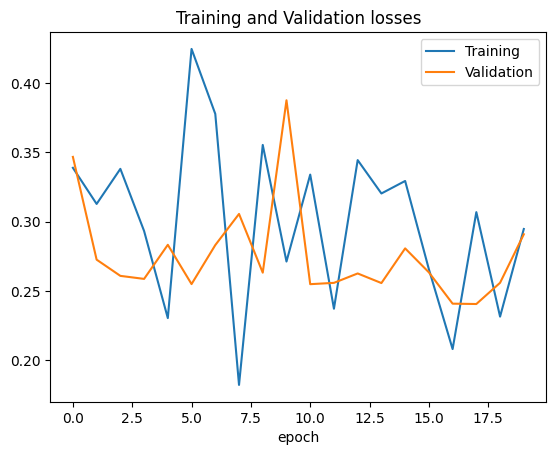

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation losses')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

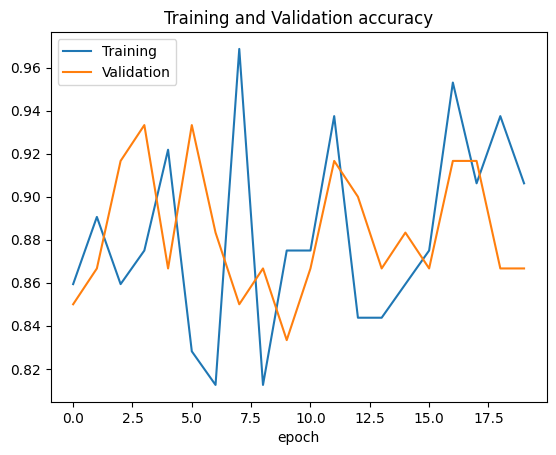

In [36]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation accuracy')
plt.xlabel('epoch')

In [37]:
test_loss, test_acc = model.evaluate(test_set)
print('test loss :{}   test accuracy :{}'.format(test_loss,test_acc))

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 408ms/step - accuracy: 0.8694 - loss: 0.2941
test loss :0.290916383266449   test accuracy :0.8666666746139526


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 654ms/step


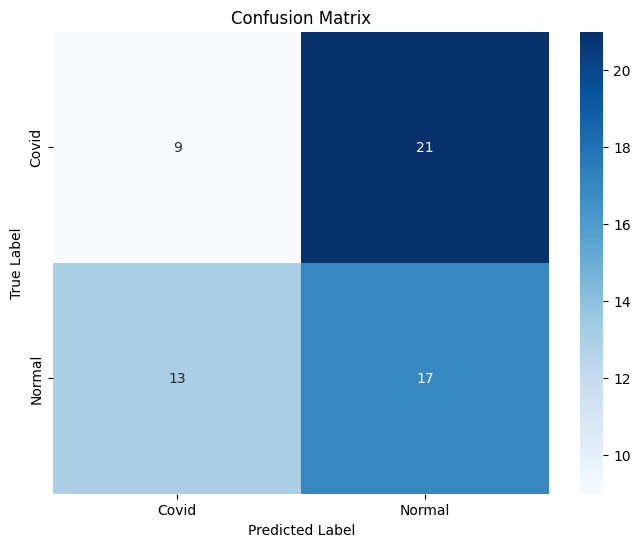

In [38]:
import numpy as np
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns

# Get true labels and predicted probabilities for the test set
test_labels = test_set.classes
predictions = model.predict(test_set)
predicted_labels = np.argmax(predictions, axis=1)

# Get class names for confusion matrix labels
class_names = list(test_set.class_indices.keys())

# Plot Confusion Matrix
cm = confusion_matrix(test_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


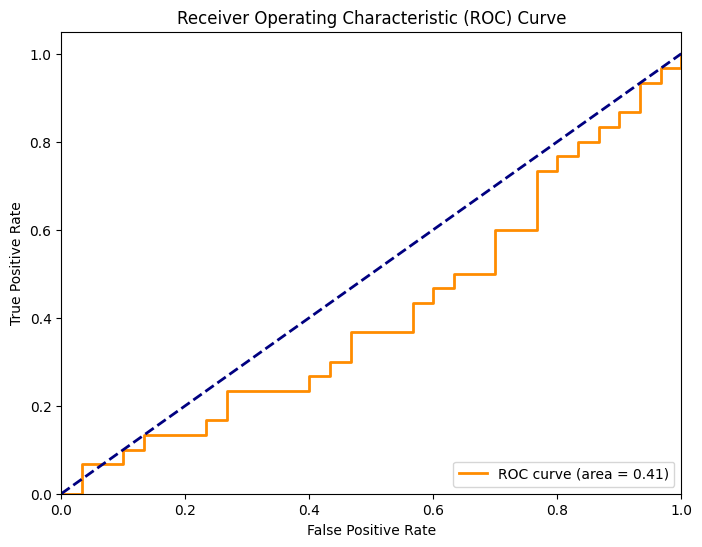

In [39]:
# Plot ROC Curve
fpr, tpr, _ = roc_curve(test_labels, predictions[:, 1]) # Assuming 'Covid' is class 1
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


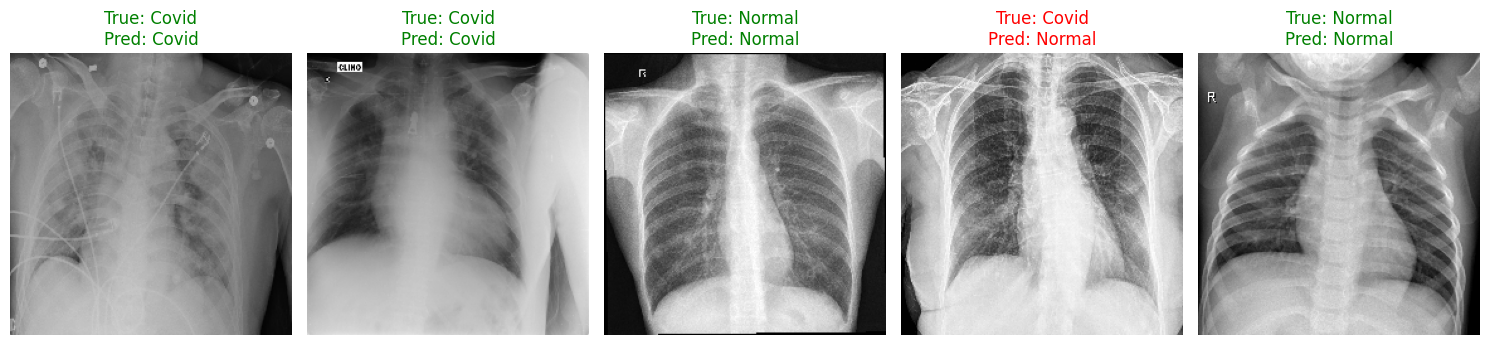

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow.keras.preprocessing import image
import os

# Get class names and their inverse mapping (index to name)
class_names = list(test_set.class_indices.keys())
idx_to_class_name = {v: k for k, v in test_set.class_indices.items()}

# Get all image file paths from the test directory
all_test_image_paths = []
for class_name_folder in os.listdir(test_dir):
    class_folder_path = os.path.join(test_dir, class_name_folder)
    if os.path.isdir(class_folder_path):
        for img_name in os.listdir(class_folder_path):
            if img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                all_test_image_paths.append(os.path.join(class_folder_path, img_name))

# Randomly select 5 images (or fewer if less than 5 are available)
num_images_to_display = min(5, len(all_test_image_paths))
random_image_paths = random.sample(all_test_image_paths, num_images_to_display)

plt.figure(figsize=(15, 5 * num_images_to_display / 2))

for i, img_path in enumerate(random_image_paths):
    # Extract true label from the image path
    true_label_folder_name = os.path.basename(os.path.dirname(img_path))
    true_label = true_label_folder_name

    # Load and preprocess the image for the model
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Rescale as done by ImageDataGenerator
    img_for_prediction = np.expand_dims(img_array, axis=0)

    # Get model prediction
    prediction_scores = model.predict(img_for_prediction, verbose=0)
    predicted_label_idx = np.argmax(prediction_scores)
    predicted_label = idx_to_class_name[predicted_label_idx]

    # Determine color based on correctness
    title_color = 'green' if predicted_label == true_label else 'red'

    # Display the image and labels
    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(img_array)
    plt.title(f"True: {true_label}\nPred: {predicted_label}", color=title_color) # Apply color to the title
    plt.axis('off')

plt.tight_layout()
plt.show()